In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [60]:
import math as m
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from descartes.patch import PolygonPatch
from geometry.panels import generate_modules, modules_to_panels, modules_to_panels_test, sector_id
from geometry.cmssw import read_geometry
from shapely.geometry import Point

In [63]:
mpl.rcParams['figure.figsize'] = [12, 8]

In [55]:
treename = 'hgcaltriggergeomtester/TreeCells'
input_file = '/home/llr/cms/sauvan/Projects/L1CalorimeterTrigger_Phase2HGCal/CMSSW/CMSSW_9_4_0_pre2/src/L1Trigger/L1THGCal/test/test_triggergeom.root'
cells_cmssw_3_1 = read_geometry(filename=input_file, treename=treename, subdet=3, layer=1, wafer=-1)
cells_cmssw_3_28 = read_geometry(filename=input_file, treename=treename, subdet=3, layer=28, wafer=-1)
cells_cmssw_4_12 = read_geometry(filename=input_file, treename=treename, subdet=4, layer=12, wafer=-1)

In [56]:
cells_cmssw = [
    cells_cmssw_3_1,
    cells_cmssw_3_28,
    cells_cmssw_4_12
]
inner_circles = []
outer_circles = []
min_radii = []
max_radii = []
for cells in cells_cmssw:
    cells_radius = map(lambda c: c.center.x**2+c.center.y**2, cells)
    max_radius = m.sqrt(max(cells_radius))
    min_radius = m.sqrt(min(cells_radius))
    outer_circles.append(Point((0,0)).buffer(max_radius))
    inner_circles.append(Point((0,0)).buffer(min_radius))
    min_radii.append(min_radius)
    max_radii.append(max_radius)


In [100]:
module_to_panel, panel_to_modules = modules_to_panels(wafer_size=19.041, grid_size=13)
modules = generate_modules(wafer_size=19.041, grid_size=13)
modules_dict = {mod.id:mod for mod in modules}

In [3]:
colors = [cm.get_cmap('Vega20')(i) for i in range(20)]
colors.extend([cm.get_cmap('Set3')(i) for i in range(12)])
colors.extend([cm.get_cmap('Dark2')(i) for i in range(8)])

/grid_mnt/vol__vol_U__u/llr/cms/sauvan/.local/share/virtualenvs/geometry/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


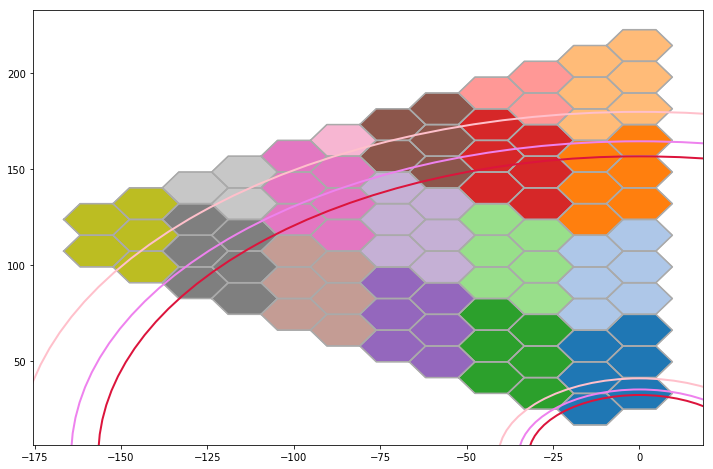

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)
plotted_modules = []
# Plot with different colors groups of modules mapped to different panels
for i,(panel,panel_modules) in enumerate(panel_to_modules.items()):
    if sector_id(panel)!=0: continue
    color = colors[i%len(colors)]
    for module in panel_modules:
        plotted_modules.append(modules_dict[module])
        patch = PolygonPatch(modules_dict[module].vertices, facecolor=color, edgecolor='#AAAAAA',  zorder=1)
        ax.add_patch(patch)
# Plot module borders
for module in plotted_modules:
    x, y = module.vertices.exterior.xy
    ax.plot(x, y, color='#AAAAAA', zorder=1)
#plt.rcParams['savefig.dpi'] = 1000
circles_in = []
circles_out = []
for i,color in enumerate(['crimson', 'violet', 'pink']):
    circles_in.append(plt.Circle((0, 0), min_radii[i], color=color, fill=False, linewidth=2.))
    circles_out.append(plt.Circle((0, 0), max_radii[i], color=color, fill=False, linewidth=2.))
    ax.add_artist(circles_in[-1])
    ax.add_artist(circles_out[-1])
fig.show()

In [97]:
panel_list = []
# 1st column
panel_list.append([(0,2),(0,3),(0,4)])
panel_list.append([(0,5),(0,6),(0,7)])
panel_list.append([(0,8),(0,9),(0,10),(0,11)])
# 2nd column
panel_list.append([(1,2),(1,3),(2,2)])
panel_list.append([(1,4),(1,5),(1,6)])
panel_list.append([(1,7),(1,8),(1,9),(1,10)])
# 3rd column
panel_list.append([(2,3),(2,4),(2,5)])
panel_list.append([(2,6),(2,7),(2,8),(2,9),(2,10)])
# +4 column
panel_list.append([(3,3),(3,4),(3,5)])
panel_list.append([(3,6),(3,7),(3,8),(3,9)])
# -1 column
panel_list.append([(1,1),(2,1),(3,1)])
panel_list.append([(4,1),(5,1),(6,1)])
panel_list.append([(7,1),(8,1),(9,1),(10,1)])
# -2 column
panel_list.append([(3,2),(4,2),(5,2)])
panel_list.append([(6,2),(7,2),(8,2),(9,2),(10,2)])
# -3 column
panel_list.append([(4,3),(5,3),(6,3),(7,3),(8,3),(9,3)])
#panel_list.append([(7,3),(8,3),(9,3)])
# -4 column
panel_list.append([(4,4),(5,4),(6,4),(7,4),(8,4)])
# +5 column
panel_list.append([(4,5),(4,6),(4,7),(4,8)])
# end
panel_list.append([(5,5),(5,6),(5,7),(6,6),(7,5),(6,5)])
panel_list.append([(5,8),(6,7),(7,6),(8,5)])
module_to_panel_test, panel_to_modules_test = modules_to_panels_test(wafer_size=19.041,
                                                                     grid_size=13,
                                                                     panel_list=panel_list
                                                                    )

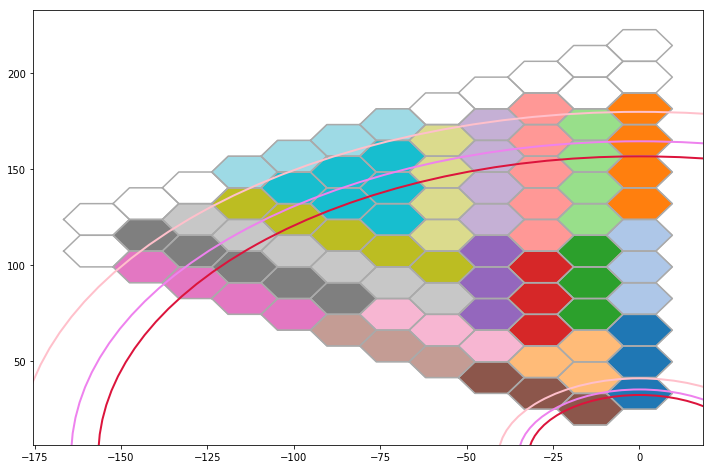

In [105]:
fig_test = plt.figure()
ax_test = fig_test.add_subplot(111)
# Plot with different colors groups of modules mapped to different panels
for i,(panel,panel_modules) in enumerate(panel_to_modules_test.items()):
    if sector_id(panel)!=0: continue
    color = colors[i%len(colors)]
    for module in panel_modules:
        patch = PolygonPatch(modules_dict[module].vertices, facecolor=color, edgecolor='#AAAAAA',  zorder=1)
        ax_test.add_patch(patch)
# Plot module borders
for module in plotted_modules:
    x, y = module.vertices.exterior.xy
    ax_test.plot(x, y, color='#AAAAAA', zorder=1)
circles_in = []
circles_out = []
for i,color in enumerate(['crimson', 'violet', 'pink']):
    circles_in.append(plt.Circle((0, 0), min_radii[i], color=color, fill=False, linewidth=2.))
    circles_out.append(plt.Circle((0, 0), max_radii[i], color=color, fill=False, linewidth=2.))
    ax_test.add_artist(circles_in[-1])
    ax_test.add_artist(circles_out[-1])
fig_test.show()